# 1. Data Pre-processing

In [1]:
# data import, feature generation, EDA
import pandas as pd

## 1.1 Load Data

In [2]:
# import data
df_train = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/train.csv')

# test data has problems. don't use until figured out.
# df_test = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test.csv')
# df_test_labels = pd.read_csv('data/jigsaw-toxic-comment-classification-challenge/test_labels.csv')

# # merge test set and test labels
# df_test = pd.merge(df_test, df_test_labels)

## 1.2 Cleaning Text (low priority)

Passing cleaned text into models did not improve performance. Therefore, cleaning is a low-priority task.

In [3]:
# # cleaning functions

# # # removes html tags from text
# # from bs4 import BeautifulSoup
# # def strip_html(text):
# #     soup = BeautifulSoup(text, "html.parser")
# #     return soup.get_text()


# # Define function for removing special characters
# import re
# def remove_special_characters(text):
#     # remove urls
#     # remove wikipedia <>:<> tags
#     # remove alphanumeric words
#     # remove numeric and punctuation except those specified
#     pattern=r"(@^(https?|ftp)://[^\s/$.?#].[^\s]*$@iS|[A-Z]\S*:[A-Z]\S*|([a-z]+[0-9]+|[0-9]+[a-z]+)[a-z0-9]*|[^a-zA-z\.\'\:\-\?\!\s])"
#     text=re.sub(pattern,'',text)
#     # replace punctuation except apostrophes with spaces
#     pattern=r'[^a-zA-z\'\s]'
#     text=re.sub(pattern,' ',text)
#     return text

# import nltk
# nltk.download('wordnet')
# from nltk.stem.wordnet import WordNetLemmatizer

# # lemmatizing the text
# def simple_lemmatizer(text):
#     wn=WordNetLemmatizer()
#     text= ' '.join([wn.lemmatize(word) for word in text.split()])
#     return text

# # remove apostrophe from contractions
# import re
# def strip_contractions(text):
#     pattern=r'[^a-zA-z\s]'
#     text=re.sub(pattern,'',text)
#     return text

# # cleaning the text
# def denoise_text(text):
# #     text = strip_html(text)
#     text = remove_special_characters(text)
#     text = simple_lemmatizer(text)
#     text = strip_contractions(text)
#     return text

# # applies cleaning functions on review's column
# # train['comment_text'] = train_orig['comment_text'].apply(denoise_text)
# # test['comment_text'] = test_orig['comment_text'].apply(denoise_text)

# 2. EDA / Feature Engineering

## 2.1 Manual Feature Extraction / Engineering

In [4]:
# for creating indices, plots
import numpy as np

import string

In [5]:
%%time
df_train['count_char'] = df_train['comment_text'].str.len()
df_train['count_word'] = df_train['comment_text'].apply(lambda x: len(str(x).split()))
df_train['avg_word_len'] = df_train['comment_text'].str.split().apply(lambda x: np.mean(np.array([len(word) for word in x])))
df_train['count_line'] = df_train['comment_text'].apply(lambda x: len(str(x).splitlines()))
df_train['avg_line_len'] = df_train['comment_text'].apply(lambda x: np.mean(np.array([len(line) for line in str(x).splitlines()])))

df_train['count_word_unique'] = df_train['comment_text'].str.split().apply(lambda x: len(set(x)))
df_train['prop_word_unique'] = df_train['count_word_unique'] / df_train['count_word']

# # abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789
# df_train['count_word_alnum'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isalnum() for word in x])))
# df_train['prop_word_alnum'] = df_train['count_word_alnum'] / df_train['count_word']

# abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
df_train['count_word_alpha'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isalpha() for word in x])))
df_train['prop_word_alpha'] = df_train['count_word_alpha'] / df_train['count_word']

df_train['count_word_ascii'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isascii() for word in x])))
df_train['prop_word_ascii'] = df_train['count_word_ascii'] / df_train['count_word']

df_train['count_word_decimal'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isdecimal() for word in x])))
df_train['prop_word_decimal'] = df_train['count_word_decimal'] / df_train['count_word']

# 0123456789
df_train['count_word_digit'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isdigit() for word in x])))
df_train['prop_word_digit'] = df_train['count_word_digit'] / df_train['count_word']

df_train['count_word_lower'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.islower() for word in x])))
df_train['prop_word_lower'] = df_train['count_word_lower'] / df_train['count_word']

df_train['count_word_numeric'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isnumeric() for word in x])))
df_train['prop_word_numeric'] = df_train['count_word_numeric'] / df_train['count_word']

# 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c
df_train['count_word_printable'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isprintable() for word in x])))
df_train['prop_word_printable'] = df_train['count_word_printable'] / df_train['count_word']

# df_train['count_word_space'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isspace() for word in x])))
# df_train['prop_word_space'] = df_train['count_word_space'] / df_train['count_word']

df_train['count_word_title'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.istitle() for word in x])))
df_train['prop_word_title'] = df_train['count_word_title'] / df_train['count_word']

df_train['count_word_upper'] = df_train.comment_text.str.split().apply(lambda x: np.sum(np.array([word.isupper() for word in x])))
df_train['prop_word_upper'] = df_train['count_word_upper'] / df_train['count_word']

# abcdefghijklmnopqrstuvwxyz
df_train['count_char_ascii_lowercase'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.ascii_lowercase]))
df_train['prop_char_ascii_lowercase'] = df_train['count_char_ascii_lowercase'] / df_train['count_char']

# ABCDEFGHIJKLMNOPQRSTUVWXYZ
df_train['count_char_ascii_uppercase'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.ascii_uppercase]))
df_train['prop_char_ascii_uppercase'] = df_train['count_char_ascii_uppercase'] / df_train['count_char']

# 0123456789
df_train['count_char_digits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.digits]))
df_train['prop_char_digits'] = df_train['count_char_digits'] / df_train['count_char']

# 0123456789abcdefABCDEF
df_train['count_char_hexdigits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.hexdigits]))
df_train['prop_char_hexdigits'] = df_train['count_char_hexdigits'] / df_train['count_char']

# 01234567
df_train['count_char_octdigits'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.octdigits]))
df_train['prop_char_octdigits'] = df_train['count_char_octdigits'] / df_train['count_char']

# !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
df_train['count_char_punctuation'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
df_train['prop_char_punctuation'] = df_train['count_char_punctuation'] / df_train['count_char']

# 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c
df_train['count_char_printable'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.printable]))
df_train['prop_char_printable'] = df_train['count_char_printable'] / df_train['count_char']

# 
df_train['count_char_whitespace'] = df_train['comment_text'].apply(lambda x: len([char for char in str(x) if char in string.whitespace]))
df_train['prop_char_whitespace'] = df_train['count_char_whitespace'] / df_train['count_char']

Wall time: 1min 52s


## 2.2 spaCy (future work)

In [6]:
import spacy # used later in notebook

In [7]:
nlp = spacy.load("en_core_web_sm") # used later in notebook


# this step is slow. refactor code


# df_train['doc'] = df_train['comment_text'].apply(nlp)
# df_train['doc'].apply(lambda x: x.text for token in x)

# 2. Exploratory Data Analysis

## 2.1 Descriptive Statistics

In [8]:
# number of comments in data
print(f'There are {df_train.shape[0]} documents in data set.')
# class imbalance that will cause problems in model training later.
print(f'There is a class imbalance:\n{df_train.toxic.value_counts()}')

There are 159571 documents in data set.
There is a class imbalance:
0    144277
1     15294
Name: toxic, dtype: int64


The length of comments ranges from 6 to 5000 characters.

In [9]:
# summary statistics of comment character lengths
df_train.comment_text.str.len().describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64

## 2.2 Qualitative Analysis

### 2.2.1 Words that distill the essence of Classes

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
# create tfidf matrix for training set

# limit documents or computer will freeze.
df_sample = df_train.sample(frac=1/10, weights=df_train['toxic']+1, random_state=1037)

# AND/OR #

# limit features or computer will freeze.
max_features = 1000


vectorizer = TfidfVectorizer(max_features=max_features)
df_tr_vect = vectorizer.fit_transform(df_sample.comment_text)
features = vectorizer.get_feature_names()

In [12]:
# get indices of words with highest tfidf values

# make sure to limit features above or computer will freeze.

toxic_features = df_tr_vect.toarray()[df_sample['toxic']==1].mean(axis=0)
nottoxic_features = df_tr_vect.toarray()[df_sample['toxic']==0].mean(axis=0)

In [13]:
# print top important words unique to a class
n = 50 # resulting sets will contain less than n words
toxic_set = set(np.array(features)[toxic_features.argsort()[::-1][:n]])
nottoxic_set = set(np.array(features)[nottoxic_features.argsort()[::-1][:n]])
toxic_string = ' '.join(toxic_set.difference(nottoxic_set))
nottoxic_string = ' '.join(nottoxic_set.difference(toxic_set))
toxic_string_doc = nlp(toxic_string)
nottoxic_string_doc = nlp(nottoxic_string)

toxic_lemma = {token.lemma_ for token in toxic_string_doc if not token.is_stop}
nottoxic_lemma = {token.lemma_ for token in nottoxic_string_doc if not token.is_stop}

print(f'Toxic: {toxic_lemma}\n\nNot Toxic: {nottoxic_lemma}')

Toxic: {'stupid', 'fuck', 'shit', 'suck', 'ass', 'stop', 'bitch', 'like', 'don', 'fucking', 'dick'}

Not Toxic: {'thank', 'page', 'article', 'talk'}


In [14]:
# censored toxic word list:
# Toxic: {'ass', 'f**k', 'b***h', 'don', 'like', 'stop', 'dick', 'stupid', 's**t', 'suck'}

# Not Toxic: {'page', 'thank', 'article', 'talk'}

## 2.2.2 Plots

Toxic comments tend to be very short or very long relative to nontoxic comments. And toxic comments contain more uppercase characters.

In [15]:
# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

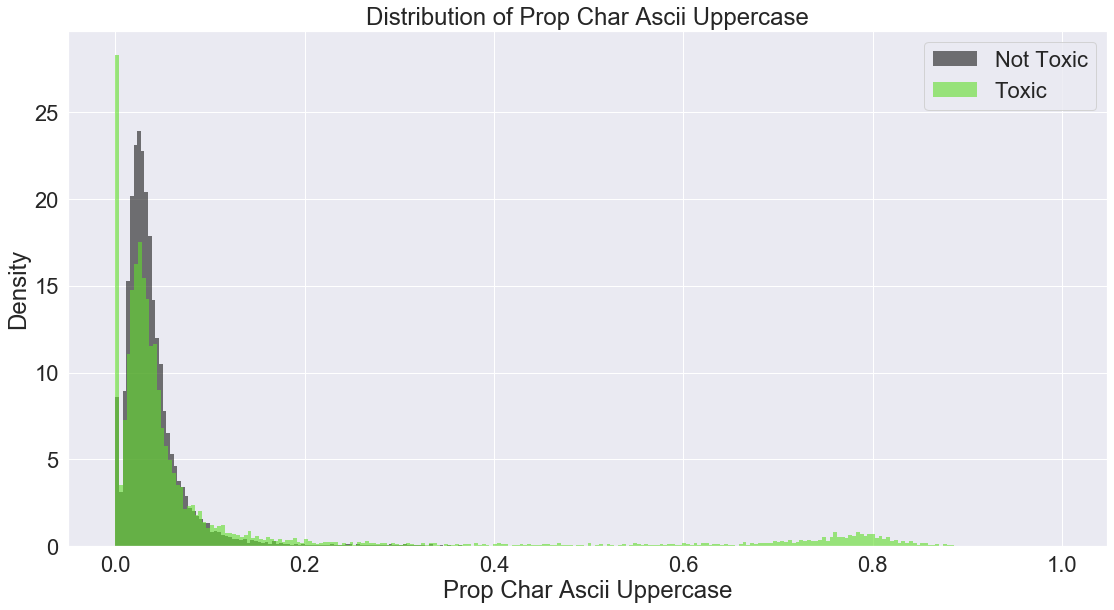

Wall time: 3 s


In [16]:
%%time

# variables for looping
col_labels = ['count_char', 'count_word', 'avg_word_len',
       'count_line', 'avg_line_len', 'count_word_unique', 'prop_word_unique',
       'count_word_alpha', 'prop_word_alpha', 'count_word_ascii',
       'prop_word_ascii', 'count_word_decimal', 'prop_word_decimal',
       'count_word_digit', 'prop_word_digit', 'count_word_lower',
       'prop_word_lower', 'count_word_numeric', 'prop_word_numeric',
       'count_word_printable', 'prop_word_printable', 'count_word_title',
       'prop_word_title', 'count_word_upper', 'prop_word_upper',
       'count_char_ascii_lowercase', 'prop_char_ascii_lowercase',
       'count_char_ascii_uppercase', 'prop_char_ascii_uppercase',
       'count_char_digits', 'prop_char_digits', 'count_char_hexdigits',
       'prop_char_hexdigits', 'count_char_octdigits', 'prop_char_octdigits',
       'count_char_punctuation', 'prop_char_punctuation',
       'count_char_printable', 'prop_char_printable', 'count_char_whitespace',
       'prop_char_whitespace']

# col_labels = ['prop_char_ascii_uppercase']

# targets = ['toxic', 'severe_toxic', 'obscene', 'threat',
#        'insult', 'identity_hate']
targets = ['toxic']

# for labels
# targets_desc = ['toxic', 'severely toxic', 'obscene', 'threatening', 'insulting', 'identity hating']
targets_desc = ['toxic']
# plotting colors
# colors = ['#61de2a', '#61de2a', 'r', 'r', 'r', 'r']
colors = ['#61de2a']

# actual plots
for col in col_labels:
    for target, target_desc, color in zip(targets, targets_desc, colors):
        sns.set(font_scale=2)
        fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
        ax = sns.distplot(df_train[df_train[target] == 0][col].values, bins=250, kde=False, 
                          hist_kws={'alpha':0.6, 'label':f'Not {target_desc.capitalize()}', 'linewidth':0}, color='k', norm_hist=True)
        ax = sns.distplot(df_train[df_train[target] != 0][col].values, bins=250, kde=False, 
                          hist_kws={'alpha':0.6, 'label':f'{target_desc.capitalize()}', 'linewidth':0}, color=color, norm_hist=True)
        if df_train[col].max() > 1:
            ax.set(xlim=(0, df_train[col].max()/2**3))
        ax.set(title=f"Distribution of {' '.join(col.split('_')).title()}", 
               xlabel=f"{' '.join(col.split('_')).title()}", 
               ylabel='Density')
        ax.legend()
#         plt.savefig('images/prop_uppercase.png')
        plt.show()

# 3. Modeling

## 3.1 Class Imbalance

Classes are imbalanced 10:1. Downsample the majority class.

Alternative approaches include:  
Upsampling the minority class  
Upsampling the minority class and Downsampling the majority class  
Using sample weighting arguments in classifier objects. --> Start here in the future as it makes my code more generalizable to new data sets.

In [17]:
df_train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

## 3.2 Train / Test Split

First train/test split the data to preserve original class imbalance. Then balance the training set.

In [18]:
from sklearn.model_selection import train_test_split

In [32]:
Xy_train, Xy_test = train_test_split(df_train, random_state=1239, stratify=df_train['toxic'])

In [33]:
# downsample the majority class

# count number of rows in each class
count_minor = Xy_train['toxic'].value_counts().min()
count_major = Xy_train['toxic'].value_counts().max()

# reproducible shuffled index
r = np.random.RandomState(1150)
indices = np.arange(count_major)
r.shuffle(indices)
downsamp_indices = indices[:count_minor]
excluded_indices = indices[count_minor:]

# subset classes
class_minor = Xy_train[Xy_train['toxic'] == 1]
class_major = Xy_train[Xy_train['toxic'] == 0].iloc[downsamp_indices]

# concatenate to class balanced dataframe
df_train_bal = pd.concat([class_minor, class_major]).sort_index()

In [35]:
X_train, y_train = df_train_bal['comment_text'], df_train_bal['toxic']

In [38]:
X_test, y_test = Xy_test['comment_text'], Xy_test['toxic']

## 3.3 Pipelines / Model Building / Hyper-parameter Tuning (*clean up code*)

##### To Do: Investigate StackingClassifier, sklearn.utils.class_weight.compute_sample_weight, sk automl

Model implementations in this section were chosen for speed of convergence to allow more iterations of tuning.

In [39]:
# for pipelines
from sklearn.pipeline import make_pipeline

# for cross-validating pipeline estimators
from sklearn.model_selection import cross_validate

# vectorizers
from sklearn.feature_extraction.text import CountVectorizer

# latent topics
# nmf did not improve models

# standardizers
# standardization did not improve models. tfidf values are already between 0, 1 but with unequal variance.

# classifiers
# choose implementations of algorithms that can handle massive sparse matrices
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [40]:
# for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

### Logistic Regression (Elastic net) (AUC: 0.965 +/- 0.002) (fit time: 2.316 +/- 0.354, score time: 0.421 +/- 0.054)

In [41]:
%%time
#Logistic Ridge Regression #needs tuning. #worse performance when data is standardized
lr = make_pipeline(TfidfVectorizer(), SGDClassifier(loss='log', 
                                                    penalty='elasticnet', 
                                                    alpha=0.00001, 
                                                    l1_ratio=0.95, 
                                                    random_state=1959, early_stopping=True))
scores_lr = cross_validate(lr, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(lr.steps, [[k, v.mean(), v.std()] for k, v in scores_lr.items()], sep='\n')

# fit best model-to-date
lr.fit(X_train, y_train)

Wall time: 2.02 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=1e-05, average=False, class_weight=None,
                               early_stopping=True, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.95,
                               learning_rate='optimal', loss='log',
               

In [26]:
# # ALREADY TUNED

# %%time
# #Logistic Regression hyperparameter tuning
# random_params_lr = [{'sgdclassifier__alpha':np.logspace(-4, 4), 
#                      'sgdclassifier__l1_ratio':scipy.stats.beta(a=0.766, b=0.277)}]

# rs_lr = RandomizedSearchCV(lr, param_distributions=random_params_lr, n_iter=50, scoring='roc_auc', n_jobs=-1)

# rs_lr.fit(X_train, y_train)
# print(rs_lr.best_score_)
# print(rs_lr.best_params_)

### SVC with Linear Kernel (AUC: 0.961 +/- 0.002) (fit time: 2.099 +/- 0.061, score time: 0.460 +/- 0.050)

In [42]:
%%time
#SVM with Linear Kernel #worse performance when data is standardized
svm = make_pipeline(TfidfVectorizer(), SGDClassifier(alpha=0.0001, random_state=2000, early_stopping=True))
scores_svm = cross_validate(svm, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(svm.steps, [[k, v.mean(), v.std()] for k, v in scores_svm.items()], sep='\n')

# fit best model-to-date
svm.fit(X_train, y_train)

Wall time: 1.92 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=True, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='op

In [28]:
# # ALREADY TUNED

# %%time
# #SVM with Linear Kernel hyperparameter tuning
# random_params_svm = [{'sgdclassifier__alpha':np.logspace(-4, 0)}]

# rs_svm = RandomizedSearchCV(svm, param_distributions=random_params_svm, n_iter=60, scoring='roc_auc', n_jobs=-1)

# rs_svm.fit(X_train, y_train)
# print(rs_svm.best_score_)
# print(rs_svm.best_params_)

### Gradient-boosted Classifier (AUC: 0.965 +/- 0.002) (fit time: 115.341 +/- 0.781, score time: 1.007 +/- 0.095)

In [43]:
%%time
#LGBMClassifier #needs tuning
lgbm = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type='gbdt',
                                                       num_leaves=19,
                                                       max_depth=28,
                                                       learning_rate=0.09, 
                                                       n_estimators=400,
                                                       min_child_samples=13,
                                                       random_state=2015, 
                                                       n_jobs=-1, 
                                                       max_bin=233
                                                      ))
scores_lgbm = cross_validate(lgbm, X_train, y_train, scoring='roc_auc', n_jobs=-1)

print(lgbm.steps, [[k, v.mean(), v.std()] for k, v in scores_lgbm.items()], sep='\n')

# fit best model-to-date
lgbm.fit(X_train, y_train)

Wall time: 28.7 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.09, max_bin=233, max_depth=28,
                                min_child_samples=13, min_child_weight=

In [311]:
# %%time
# # LGBMClassifier hyperparameter tuning #choose carefully to minimize running time!!
# lgbm = make_pipeline(TfidfVectorizer(), LGBMClassifier(n_jobs=-1))
# random_params_lgbm = [{'lgbmclassifier__num_leaves':scipy.stats.randint(10, 120),
#                        'lgbmclassifier__max_depth':scipy.stats.randint(5, 30),
#                        'lgbmclassifier__learning_rate':np.logspace(-4, -1),
#                        'lgbmclassifier__n_estimators':np.logspace(2, 3).astype(int),
#                        'lgbmclassifier__min_child_samples':np.logspace(1,3).astype(int),
#                        'lgbmclassifier__max_bin':np.arange(2,255+1)
#                       }]

# for _ in range(1):
#     rs_lgbm = RandomizedSearchCV(lgbm, param_distributions=random_params_lgbm, n_iter=1, scoring='roc_auc', n_jobs=-1)

#     rs_lgbm.fit(X_train, y_train)
#     print(rs_lgbm.best_score_)
#     print(rs_lgbm.best_params_)

0.8104134853136455
{'lgbmclassifier__learning_rate': 0.0010985411419875584, 'lgbmclassifier__max_bin': 55, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__min_child_samples': 355, 'lgbmclassifier__n_estimators': 212, 'lgbmclassifier__num_leaves': 114}
0.9431566103606771
{'lgbmclassifier__learning_rate': 0.08685113737513521, 'lgbmclassifier__max_bin': 156, 'lgbmclassifier__max_depth': 11, 'lgbmclassifier__min_child_samples': 104, 'lgbmclassifier__n_estimators': 152, 'lgbmclassifier__num_leaves': 97}
0.871974157975508
{'lgbmclassifier__learning_rate': 0.00026826957952797245, 'lgbmclassifier__max_bin': 8, 'lgbmclassifier__max_depth': 24, 'lgbmclassifier__min_child_samples': 19, 'lgbmclassifier__n_estimators': 596, 'lgbmclassifier__num_leaves': 60}
0.863428400839459
{'lgbmclassifier__learning_rate': 0.00020235896477251576, 'lgbmclassifier__max_bin': 180, 'lgbmclassifier__max_depth': 18, 'lgbmclassifier__min_child_samples': 25, 'lgbmclassifier__n_estimators': 294, 'lgbmclassifier__num_lea

0.8053346587017876
{'lgbmclassifier__learning_rate': 0.0007196856730011522, 'lgbmclassifier__max_bin': 21, 'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_child_samples': 54, 'lgbmclassifier__n_estimators': 232, 'lgbmclassifier__num_leaves': 76}
0.9079214645080718
{'lgbmclassifier__learning_rate': 0.005963623316594642, 'lgbmclassifier__max_bin': 99, 'lgbmclassifier__max_depth': 20, 'lgbmclassifier__min_child_samples': 115, 'lgbmclassifier__n_estimators': 323, 'lgbmclassifier__num_leaves': 116}
0.9652398242943002
{'lgbmclassifier__learning_rate': 0.08685113737513521, 'lgbmclassifier__max_bin': 233, 'lgbmclassifier__max_depth': 28, 'lgbmclassifier__min_child_samples': 13, 'lgbmclassifier__n_estimators': 409, 'lgbmclassifier__num_leaves': 19}
0.864813291791102
{'lgbmclassifier__learning_rate': 0.00015264179671752333, 'lgbmclassifier__max_bin': 188, 'lgbmclassifier__max_depth': 22, 'lgbmclassifier__min_child_samples': 19, 'lgbmclassifier__n_estimators': 132, 'lgbmclassifier__num_leave

### Multinomial Naive Bayes (AUC: 0.950 +/- 0.001) (fit time: 2.741 +/- 0.061, score time: 0.580 +/- 0.025)

In [44]:
%%time
#MultinomialNB #can tune smoothing alpha
mnb = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=0.4))
scores_mnb = cross_validate(mnb, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(mnb.steps, [[k, v.mean(), v.std()] for k, v in scores_mnb.items()], sep='\n')

# fit best model-to-date
mnb.fit(X_train, y_train)

Wall time: 1.76 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True))],
         verbose=False)

In [24]:
##ALREADY TUNED

# %%time
# #MultinomialNB hyperparameter tuning
# random_params_mnb = [{'multinomialnb__alpha': scipy.stats.uniform()}]

# rs_mnb = RandomizedSearchCV(mnb, param_distributions=random_params_mnb, n_iter=20, scoring='roc_auc', n_jobs=-1)

# rs_mnb.fit(X_train, y_train)
# print(rs_mnb.best_score_)
# print(rs_mnb.best_params_)

### Random Forest Implementations

#### scikit-learn (AUC: 0.921 +/- 0.002) (fit time: 70.437 +/- 0.451, score time: 1.161 +/- 0.228)

In [45]:
%%time
#RandomForestClassifier #relatively slow fitting
sk_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_jobs=-1, random_state=2007))
scores_sk_rf = cross_validate(sk_rf, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(sk_rf.steps, [[k, v.mean(), v.std()] for k, v in scores_sk_rf.items()], sep='\n')

# fit best model-to-date
sk_rf.fit(X_train, y_train)

Wall time: 18 s


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

#### LightGBM

In [46]:
%%time
#LGBM Random Forest #needs tuning
lgbm_rf = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type="rf",
                         num_leaves=25,
                         max_depth=21,
                         min_child_samples=1,
                         n_estimators=954,
                         subsample=.632, # Standard RF bagging fraction
                         subsample_freq=1,
                         colsample_bytree=.005,
                         random_state=2015, n_jobs=-1))
scores_lgbm_rf = cross_validate(lgbm_rf, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(lgbm_rf.steps, [[k, v.mean(), v.std()] for k, v in scores_lgbm_rf.items()], sep='\n')

Wall time: 0 ns


In [312]:
# %%time
# #LGBMClassifier hyperparameter tuning
# lgbm_rf = make_pipeline(TfidfVectorizer(), LGBMClassifier(boosting_type="rf",
#                          num_leaves=25,
#                          max_depth=21,
#                          min_child_samples=1,
#                          n_estimators=954,
#                          subsample=.632, # Standard RF bagging fraction
#                          subsample_freq=1,
#                          colsample_bytree=.005,
#                          random_state=2015, n_jobs=-1))
# random_params_lgbm_rf = [{'lgbmclassifier__num_leaves':np.logspace(1,2.5).astype(int),
#                        'lgbmclassifier__max_depth':scipy.stats.randint(10, 30),
#                        'lgbmclassifier__n_estimators':np.logspace(2,3).astype(int),
#                        'lgbmclassifier__min_child_samples':np.logspace(0,3.75).astype(int),
#                       }]

# for i in range(1):
#     print(i+1)
#     rs_lgbm_rf = RandomizedSearchCV(lgbm_rf, param_distributions=random_params_lgbm_rf, n_iter=1, scoring='roc_auc', n_jobs=-1)

#     rs_lgbm_rf.fit(X_train, y_train)
#     print(rs_lgbm_rf.best_score_)
#     print(rs_lgbm_rf.best_params_)

1
0.8203801433404607
{'lgbmclassifier__max_depth': 11, 'lgbmclassifier__min_child_samples': 8, 'lgbmclassifier__n_estimators': 138, 'lgbmclassifier__num_leaves': 11}
2
0.7721593763800643
{'lgbmclassifier__max_depth': 23, 'lgbmclassifier__min_child_samples': 165, 'lgbmclassifier__n_estimators': 175, 'lgbmclassifier__num_leaves': 126}
3
0.797884192795884
{'lgbmclassifier__max_depth': 28, 'lgbmclassifier__min_child_samples': 57, 'lgbmclassifier__n_estimators': 175, 'lgbmclassifier__num_leaves': 10}
4
0.8286523579574174
{'lgbmclassifier__max_depth': 26, 'lgbmclassifier__min_child_samples': 14, 'lgbmclassifier__n_estimators': 471, 'lgbmclassifier__num_leaves': 109}
5
0.7727629941722807
{'lgbmclassifier__max_depth': 13, 'lgbmclassifier__min_child_samples': 138, 'lgbmclassifier__n_estimators': 152, 'lgbmclassifier__num_leaves': 21}
6
0.7514311813008272
{'lgbmclassifier__max_depth': 26, 'lgbmclassifier__min_child_samples': 568, 'lgbmclassifier__n_estimators': 294, 'lgbmclassifier__num_leaves':

### Ensemble Models (experimentation)

A Decision Tree trained on predictions from my 5 best-in-class models performed worse than any individual model.  
A Random Forest model-of-models exhibited similar poor performance.  
Building a model-of-models is a good avenue for future exploration.

In [47]:
from sklearn.metrics import plot_roc_curve

#### Manual Ensembling (Decision Tree, Random Forest)

In [58]:
%%time
# soft classification is better than hard classification when building a model-of-models ensemble
lr_pred_prob_tr = lr.predict_proba(X_train)[:, 1]
lgbm_pred_prob_tr = lgbm.predict_proba(X_train)[:, 1]
svm_pred_prob_tr = svm.predict(X_train)
mnb_pred_prob_tr = mnb.predict_proba(X_train)[:, 1]
sk_rf_pred_prob_tr = sk_rf.predict_proba(X_train)[:, 1]

lr_pred_prob_te = lr.predict_proba(X_test)[:, 1]
lgbm_pred_prob_te = lgbm.predict_proba(X_test)[:, 1]
svm_pred_prob_te = svm.predict(X_test)
mnb_pred_prob_te = mnb.predict_proba(X_test)[:, 1]
sk_rf_pred_prob_te = sk_rf.predict_proba(X_test)[:, 1]

# Hard classification results in information loss and ensembled model performs worse
# lr_pred_prob_tr = lr.predict(X_train)
# lgbm_pred_prob_tr = lgbm.predict(X_train)
# svm_pred_prob_tr = svm.predict(X_train)
# mnb_pred_prob_tr = mnb.predict(X_train)
# sk_rf_pred_prob_tr = sk_rf.predict(X_train)

# lr_pred_prob_te = lr.predict(X_test)
# lgbm_pred_prob_te = lgbm.predict(X_test)
# svm_pred_prob_te = svm.predict(X_test)
# mnb_pred_prob_te = mnb.predict(X_test)
# sk_rf_pred_prob_te = sk_rf.predict(X_test)

X_train_ensemble = np.stack((lr_pred_prob_tr, lgbm_pred_prob_tr, svm_pred_prob_tr, mnb_pred_prob_tr, sk_rf_pred_prob_tr)).T
X_test_ensemble = np.stack((lr_pred_prob_te, lgbm_pred_prob_te, svm_pred_prob_te, mnb_pred_prob_te, sk_rf_pred_prob_te)).T

Wall time: 36.2 s


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.ensemble import VotingClassifier

In [60]:
dt_ensemble = DecisionTreeClassifier()
sk_rf_ensemble = RandomForestClassifier()

In [61]:
dt_ensemble.fit(X_train_ensemble, y_train)
sk_rf_ensemble.fit(X_train_ensemble, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Soft Voting Classifier (AUC: 0.969 +/- 0.001) (fit time: 466.791 +/- 4.315, score time: 8.133 +/- 3.176)

In [50]:
%%time
vc = VotingClassifier([('lr', lr), ('lgbm', lgbm), ('mnb', mnb), ('sk_rf', sk_rf)], voting='soft') # ('svm', svm) is not compatible with soft voting option

scores_vc = cross_validate(vc, X_train, y_train, scoring='roc_auc', n_jobs=-1)
print(vc, [[k, v.mean(), v.std()] for k, v in scores_vc.items()], sep='\n')

Wall time: 0 ns


In [51]:
%%time
vc.fit(X_train, y_train)

Wall time: 53.6 s


VotingClassifier(estimators=[('lr',
                              Pipeline(memory=None,
                                       steps=[('tfidfvectorizer',
                                               TfidfVectorizer(analyzer='word',
                                                               binary=False,
                                                               decode_error='strict',
                                                               dtype=<class 'numpy.float64'>,
                                                               encoding='utf-8',
                                                               input='content',
                                                               lowercase=True,
                                                               max_df=1.0,
                                                               max_features=None,
                                                               min_df=1,
                                       

## 3.4 Model Selection

Based on 5-fold CV AUC scores, the Soft Voting Ensemble (Elastic net Logistic Regression, LightGBM Classifier, Multinomial NB, skRandom Forest) is my final model.  
Plotting average ROC curves from cv provides a visual estimate of model performance.  
* DO NOT use ROC curves on test data to compare models

In [52]:
models_tbl = pd.DataFrame({'model':['Elastic Net Logit', 'Linear Soft SVC', 'Gradient Boosted Classifier', 'Multinomial NB', 'sklearn RF', 'Soft Voting Ensemble'],
                           'fit_time': [2.842, 2.948, 129.962, 2.521, 112.597, 242.908],
                          'fit_std': [0.286, 0.086, 0.806, 0.172, 0.401, 7.552],
                          'score_time': [0.475, 0.533, 0.894, 0.509, 1.271, 9.956],
                          'score_std': [0.062, 0.095, 0.141, 0.090, 0.038, 5.467],
                            'AUC': [0.968, 0.962, 0.967, 0.951, 0.929, 0.972],
                           'AUC_std': [0.002, 0.002, 0.002, 0.002, 0.003, 0.001]})

Models should also be compared on their fitting and scoring speed. By that metric, Elastic net Logit is a very strong model.

In [53]:
models_tbl.sort_values('fit_time')

,model,fit_time,fit_std,score_time,score_std,AUC,AUC_std
3,Multinomial NB,2.521,0.172,0.509,0.090,0.951,0.002
0,Elastic Net Logit,2.842,0.286,0.475,0.062,0.968,0.002
1,Linear Soft SVC,2.948,0.086,0.533,0.095,0.962,0.002
4,sklearn RF,112.597,0.401,1.271,0.038,0.929,0.003
2,Gradient Boosted Classifier,129.962,0.806,0.894,0.141,0.967,0.002
5,Soft Voting Ensemble,242.908,7.552,9.956,5.467,0.972,0.001


# 4. Final Model: Soft Voting Classifier (Elastic net Logit, LightGBM, Multinomial NB, sk RF)

## 4.1. Under the hood

In [54]:
from sklearn.metrics import plot_confusion_matrix

In [55]:
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()

## Elastic net Logistic Regression

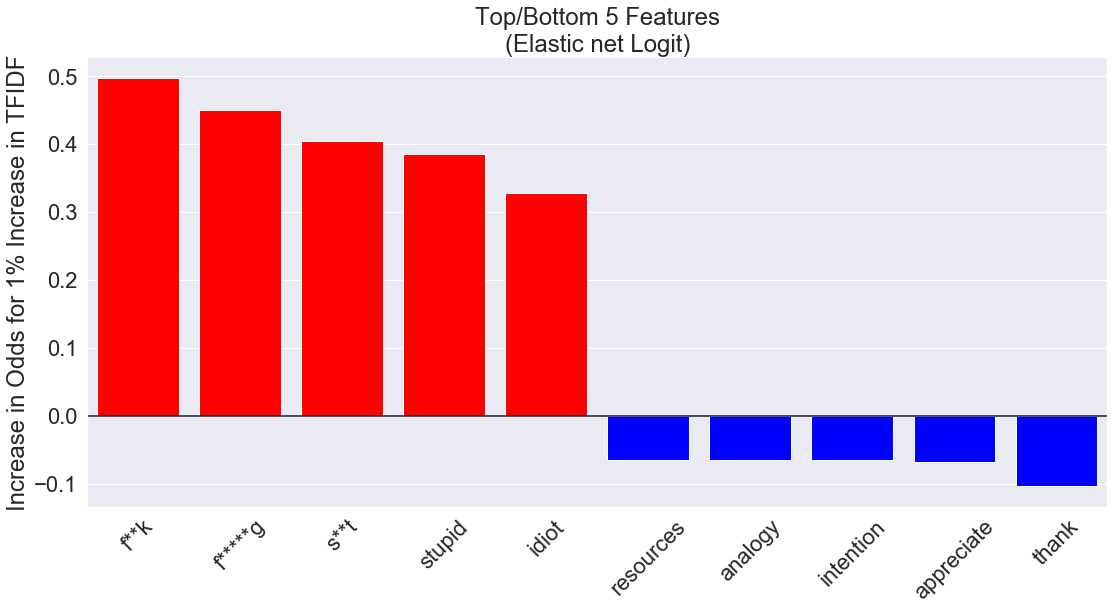

In [59]:
xs = np.arange(1, 10+1)
top_5_coef = np.exp(np.sort(lr['sgdclassifier'].coef_[0])[::-1][:5]/100) - 1
bot_5_coef = np.exp(np.sort(lr['sgdclassifier'].coef_[0])[:5][::-1]/100) - 1
bar_colors = np.concatenate((np.array(['red']*5), np.array(['blue']*5)))
bar_labels = np.concatenate((np.array(features)[lr['sgdclassifier'].coef_[0].argsort()[:5]],np.array(features)[lr['sgdclassifier'].coef_[0].argsort()[-5:]]))[::-1]

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax.bar(xs, np.concatenate((top_5_coef, bot_5_coef)), color=bar_colors)
offset = 0.5
ax.hlines(0, 1-offset, 10+offset)
ax.set(xlim=(1-offset, 10+offset), title='Top/Bottom 5 Features\n(Elastic net Logit)', 
       ylabel='Increase in Odds for 1% Increase in TFIDF')
plt.xticks(xs, ['f**k', 'f*****g', 's**t', 'stupid', 'idiot', 'resources',
       'analogy', 'intention', 'appreciate', 'thank'], rotation=45)
plt.grid(axis='x')
plt.savefig('images/elasticnetlr_features.png')
plt.show()

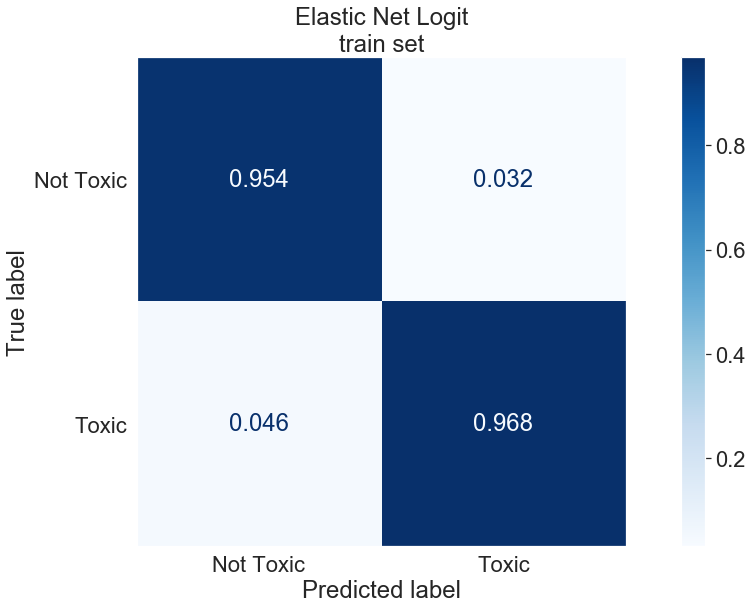

In [79]:
clf = lr
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='Elastic Net Logit\ntrain set')
ax.grid(False)
plt.savefig('images/elasticnetlr_confusion_mat.png')
plt.show()

## LightGBM Classifier

In [62]:
labels

array(['you', 'stupid', 'fucking', 'shit', 'idiot', 'fuck', 'ass', 'hell',
       'suck', 'crap'], dtype='<U4955')

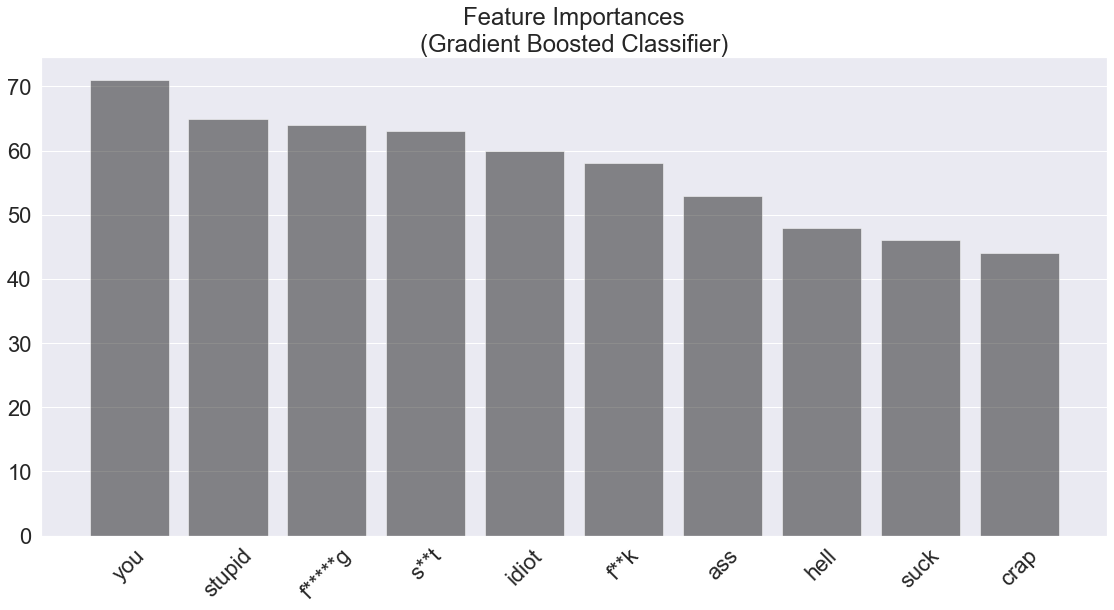

In [81]:
n = 10 # number of features to plot
importances = np.sort(lgbm['lgbmclassifier'].feature_importances_)[-n:][::-1]
labels = np.array(features)[np.argsort(lgbm['lgbmclassifier'].feature_importances_)[-n:][::-1]]

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax.bar(range(n), importances[:n], color="k", alpha=0.5)

ax.set(title="Feature Importances\n(Gradient Boosted Classifier)")
plt.xticks(range(n), ['you', 'stupid', 'f*****g', 's**t', 'idiot', 'f**k', 'ass', 'hell',
       'suck', 'crap'], rotation=45)
plt.grid(axis='x')
plt.savefig('images/lightgbm_features.png')
plt.show()

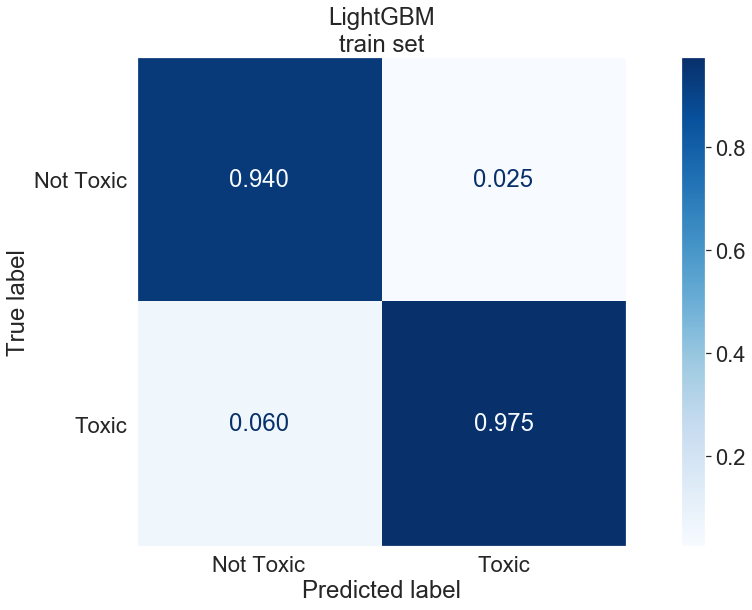

In [82]:
clf = lgbm

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='LightGBM\ntrain set')
ax.grid(False)
plt.savefig('images/lightgbm_confusion_mat.png')
plt.show()

## Linear Soft Support Vector Machine Classifier

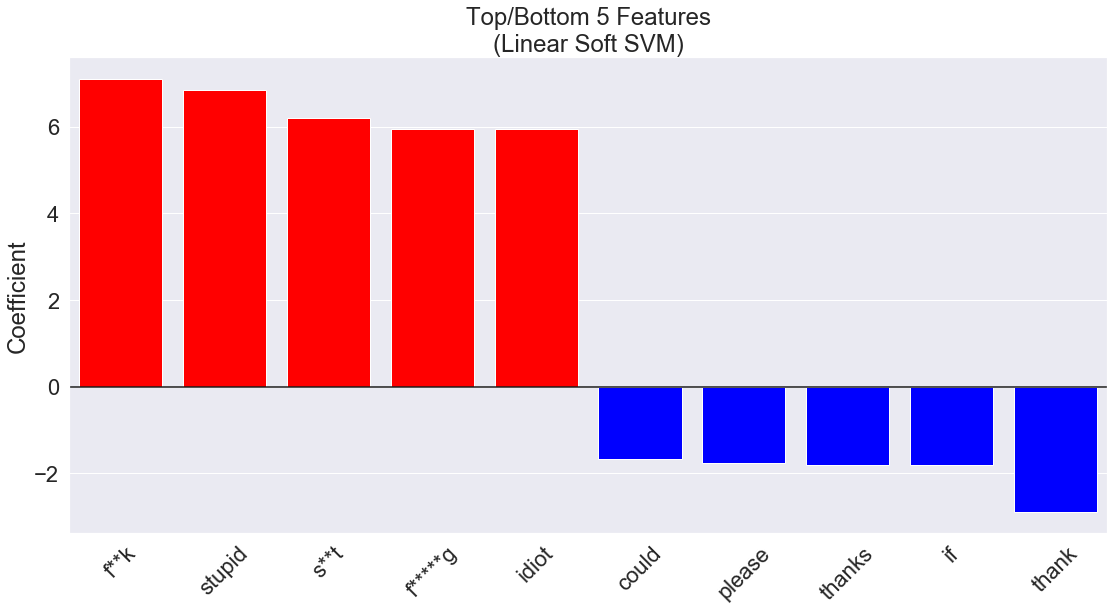

In [83]:
xs = np.arange(1, 10+1)
top_5_coef = np.sort(svm['sgdclassifier'].coef_[0])[::-1][:5]
bot_5_coef = np.sort(svm['sgdclassifier'].coef_[0])[:5][::-1]
bar_colors = np.concatenate((np.array(['red']*5), np.array(['blue']*5)))
bar_labels = np.concatenate((np.array(features)[svm['sgdclassifier'].coef_[0].argsort()[:5]],
                             np.array(features)[svm['sgdclassifier'].coef_[0].argsort()[-5:]]))[::-1]

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax.bar(xs, np.concatenate((top_5_coef, bot_5_coef)), color=bar_colors)
offset = 0.5
ax.hlines(0, 1-offset, 10+offset)
ax.set(xlim=(1-offset, 10+offset), title='Top/Bottom 5 Features\n(Linear Soft SVM)', ylabel='Coefficient')
plt.xticks(xs, ['f**k', 'stupid', 's**t', 'f*****g', 'idiot', 'could', 'please',
       'thanks', 'if', 'thank'], rotation=45)
plt.grid(axis='x')
plt.savefig('images/svm_features.png')
plt.show()

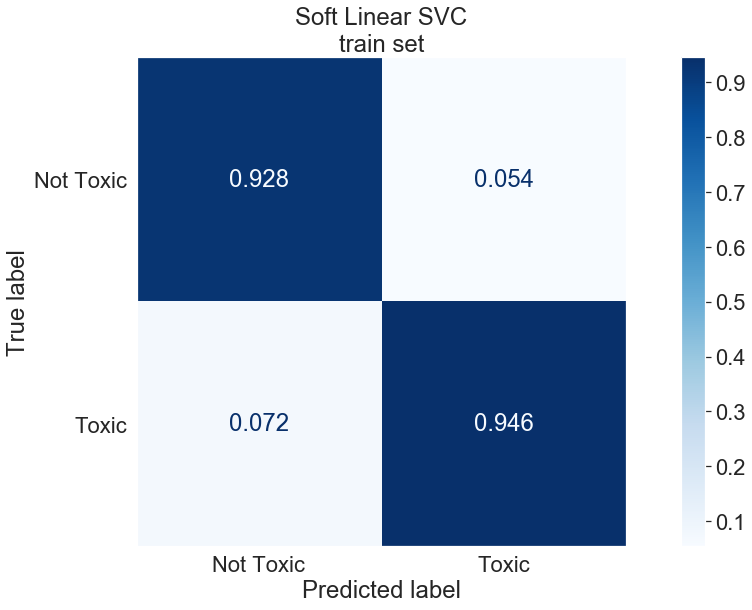

In [84]:
clf = svm

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='Soft Linear SVC\ntrain set')
ax.grid(False)
plt.savefig('images/svm_confusion_mat.png')
plt.show()

## Multinomial Naive Bayes

Only the relative probabilities of word appearances between toxic and nontoxic comments can be highlighted here.  
I can not think of an easy way to prevent infrequent words from appearing in these plots, so there is not much of interest to highlight here.

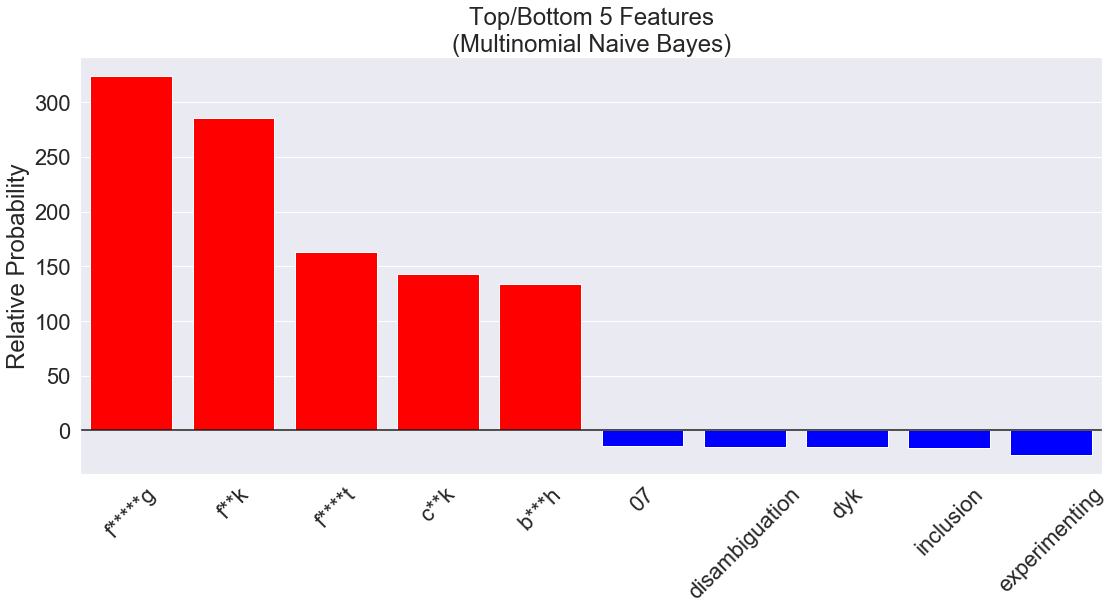

In [85]:
xs = np.arange(1, 10+1)
top_5_coef = np.sort(np.exp(mnb['multinomialnb'].feature_log_prob_[1])/np.exp(mnb['multinomialnb'].feature_log_prob_[0]))[-5:][::-1]
bot_5_coef = -np.sort(np.exp(mnb['multinomialnb'].feature_log_prob_[0])/np.exp(mnb['multinomialnb'].feature_log_prob_[1]))[-5:]
bar_colors = np.concatenate((np.array(['red']*5), np.array(['blue']*5)))
bar_labels = np.concatenate((np.array(features)[np.argsort(np.exp(mnb['multinomialnb'].feature_log_prob_[1])/np.exp(mnb['multinomialnb'].feature_log_prob_[0]))][-5:][::-1],
                             np.array(features)[np.argsort(np.exp(mnb['multinomialnb'].feature_log_prob_[0])/np.exp(mnb['multinomialnb'].feature_log_prob_[1]))][-5:]))

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax.bar(xs, np.concatenate((top_5_coef, bot_5_coef)), color=bar_colors)
offset = 0.5
ax.hlines(0, 1-offset, 10+offset)
ax.set(xlim=(1-offset, 10+offset), title='Top/Bottom 5 Features\n(Multinomial Naive Bayes)', ylabel='Relative Probability')
plt.xticks(xs, ['f*****g', 'f**k', 'f****t', 'c**k', 'b***h', '07',
       'disambiguation', 'dyk', 'inclusion', 'experimenting'], rotation=45)
plt.grid(axis='x')
plt.savefig('images/mnb_features.png')
plt.show()

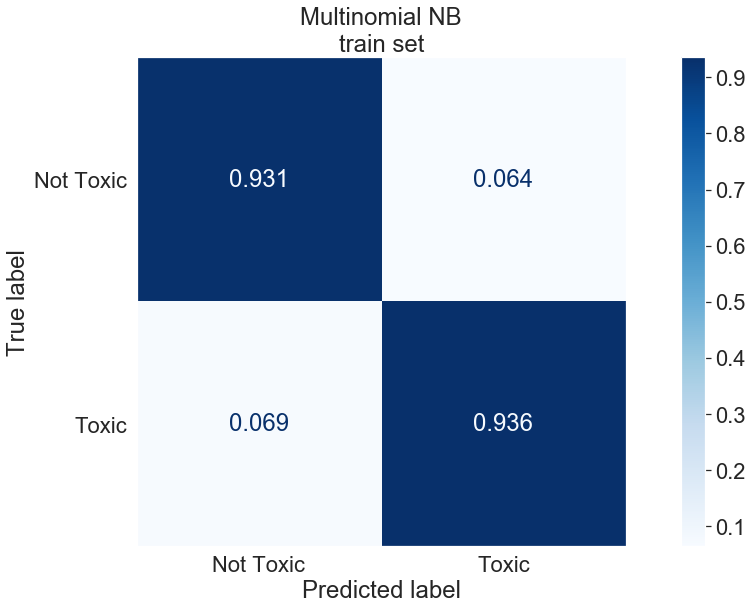

In [86]:
clf = mnb

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='Multinomial NB\ntrain set')
ax.grid(False)
plt.savefig('images/mnb_confusion_mat.png')
plt.show()

## scikit-learn Random Forest

Permutation importance (mean decrease in accuracy from permuting feature values) is recommended over the mean decrease in impurity measure. Because my feature matrix is too large for ```permutation_importance()``` to load into memory, and because all my features are continuous, it is reasonable to use mdi here.

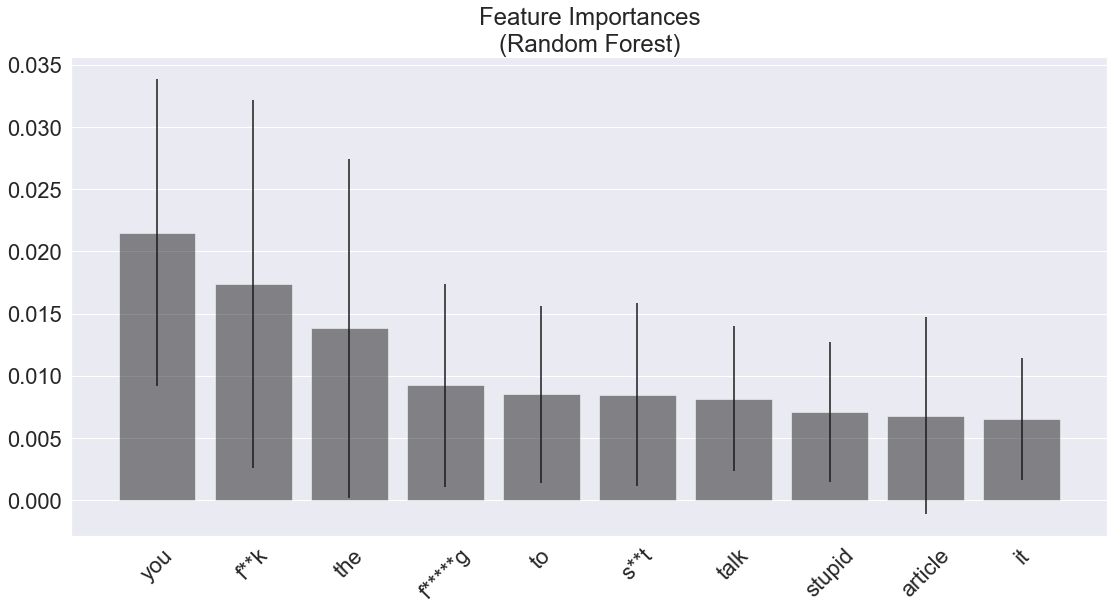

In [90]:
n = 10 # number of features to plot
forest = sk_rf['randomforestclassifier']
mdi_importances = forest.feature_importances_
mdi_std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
mdi_indices = np.argsort(mdi_importances)[::-1]
labels = np.array(features)[mdi_indices][:n]

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax.bar(range(n), mdi_importances[mdi_indices][:n], color="k", yerr=mdi_std[mdi_indices][:n], alpha=0.5)

ax.set(title="Feature Importances\n(Random Forest)")
plt.xticks(range(n), ['you', 'f**k', 'the', 'f*****g', 'to', 's**t', 'talk', 'stupid',
       'article', 'it'], rotation=45)
plt.grid(axis='x')
plt.savefig('images/sk_rf_features.png')
plt.show()

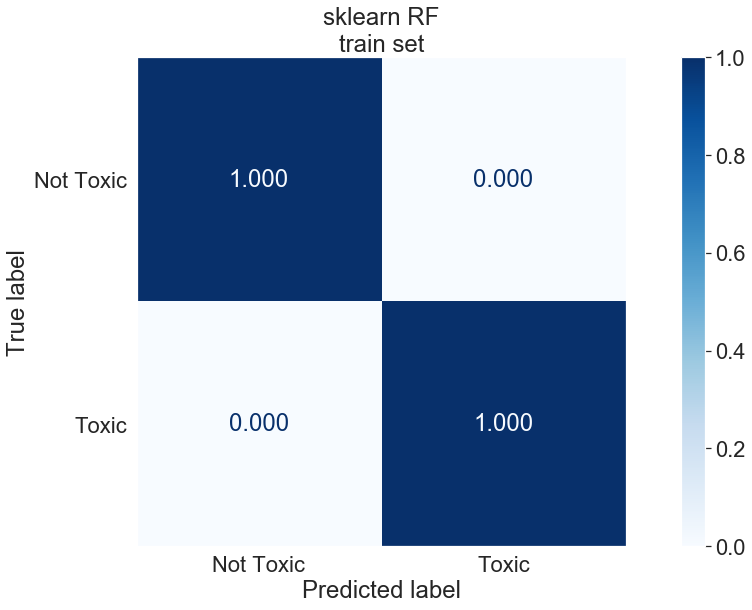

In [89]:
clf = sk_rf

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='sklearn RF\ntrain set')
ax.grid(False)
plt.savefig('images/sk_rf_confusion_mat.png')
plt.show()

## 4.2 Exploring Misclassifications

## Soft Voting Ensemble

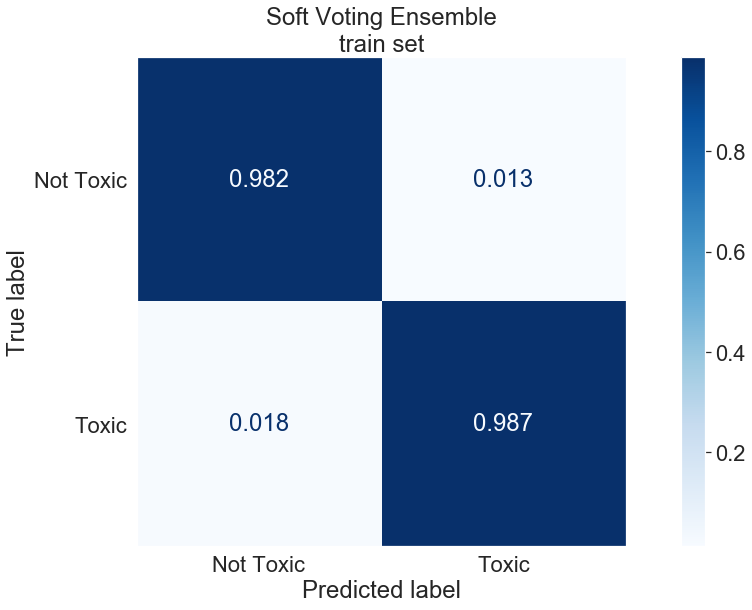

In [91]:
clf = vc

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
plot_confusion_matrix(clf, X_train, y_train, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='Soft Voting Ensemble\ntrain set')
ax.grid(False)
plt.savefig('images/voting_confusion_mat.png')
plt.show()

In [92]:
# predictions from model on test set
y_pred = vc.predict(X_train)

In [93]:
y_pred_proba = vc.predict_proba(X_train)

In [94]:
from numpy.random import RandomState

In [95]:
mis_class = pd.DataFrame(data={'comment_text':X_train[y_pred != y_train], 'proba_toxic': y_pred_proba[:, 1][y_pred != y_train]})

In [131]:
# Toxic comments misclassified as Not Toxic
row = 2
print(mis_class.sort_values(by='proba_toxic').proba_toxic.iloc[row], mis_class.sort_values(by='proba_toxic').comment_text.iloc[row])

0.2968006083345537 "

 I have to put this as sittign here cackling my head off.  Are you peopel on leave from a psyche hospital?  I just found the following post from prissy Dame Ewart on some other user's talk page.

Its all very weird.  This Gretaw is not me.  It seems she also is offended by Dame Sara so good on her.  Fancy this Sarah going to anothers talk page and speakign to them as though they are someone else.  That is so wacko.  Shows how you guys are.  Very delusional.

Its a delicious honour to be blocked from you feral ninnys.  TY for the compliment.  I just edit on Help.com but really, what a waste of time editing anywhere, especially when no one pays for the effort.

Ensure Dame Sarah reads this below the obvious delusional it is.  No one presumes to that extent unless the need some help.

Why would I register an accoutn when I wont even sign posts, (too much IT nous for that whereas the rest of u dont it seems).  

""User talk:Gretaw
From Wikipedia, the free encyclopedia

In [158]:
# Not toxic comments misclassified as Toxic
row = 10
print(mis_class.sort_values(by='proba_toxic', ascending=False).proba_toxic.iloc[row], mis_class.sort_values(by='proba_toxic', ascending=False).comment_text.iloc[row])

0.6952263032978856 But keep in mind I am a gay Jew.


# 5. Model Performance

Emulating my model's competition performance.  
Goal of > 0.98 AUC was not achieved.  
Back to the drawing board...

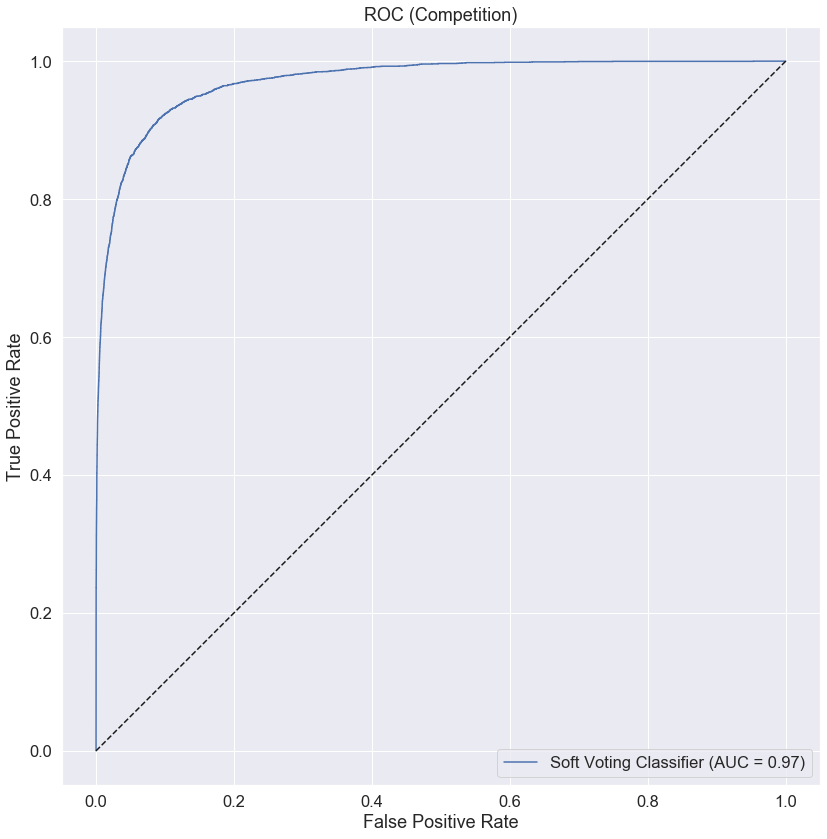

Wall time: 14.8 s


In [166]:
%%time

sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(16, 12), tight_layout=True)
my_roc = plot_roc_curve(vc, X_test, y_test, ax=ax, name='Soft Voting Classifier')
ax.plot([0, 1], [0, 1], 'k--')
# ax.set(xlim=(0, 1), ylim=(0, 1))
ax.set(title='ROC (Competition)', aspect='equal')
plt.show()

AUC on test set: 0.972


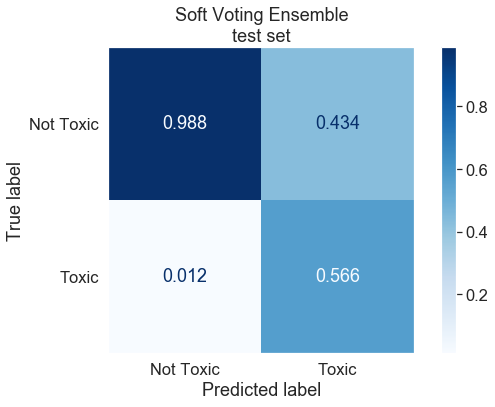

In [170]:
print(f'AUC on test set: {my_roc.roc_auc:.3f}')

clf = vc
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
plot_confusion_matrix(clf, X_test, y_test, normalize='pred', display_labels=['Not Toxic', 'Toxic'], 
                      values_format='.3f', cmap='Blues', ax=ax)
ax.set(title='Soft Voting Ensemble\ntest set')
ax.grid(False)
plt.savefig('images/voting_confusion_mat_test_set.png')
plt.show()

# 6. Future Directions / More Data

Modeling process must be repeated for 5 comment subtypes.

In [134]:
# kaggle competition data
# jigsaw_unintended_bias_tr = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/train.csv')

# jigsaw_unintended_bias_te = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test.csv')

# jigsaw_unintended_bias_te_private = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_private_expanded.csv')

# jigsaw_unintended_bias_te_public = pd.read_csv('data/jigsaw-unintended-bias-in-toxicity-classification/test_public_expanded.csv')

# wikimedia data corresponding to the data analyzed in this notebook
# attack_annotated_comments = pd.read_csv('data/4054689/attack_annotated_comments.tsv', sep='\t')

# attack_annotations = pd.read_csv('data/4054689/attack_annotations.tsv', sep='\t')

# attack_worker_demographics = pd.read_csv('data/4054689/attack_worker_demographics.tsv', sep='\t')

In [165]:
df_train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,count_char,count_word,...,count_char_hexdigits,prop_char_hexdigits,count_char_octdigits,prop_char_octdigits,count_char_punctuation,prop_char_punctuation,count_char_printable,prop_char_printable,count_char_whitespace,prop_char_whitespace
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,43,...,82,0.310606,6,0.022727,10,0.037879,264,1.0,42,0.159091
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,17,...,29,0.258929,10,0.089286,12,0.107143,112,1.0,17,0.151786
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,42,...,47,0.201717,0,0.000000,6,0.025751,233,1.0,41,0.175966
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,113,...,161,0.258842,0,0.000000,21,0.033762,622,1.0,115,0.184887
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,13,...,16,0.238806,0,0.000000,5,0.074627,67,1.0,12,0.179104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295,47,...,66,0.223729,0,0.000000,18,0.061017,295,1.0,50,0.169492
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99,18,...,26,0.262626,6,0.060606,4,0.040404,99,1.0,20,0.202020
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81,12,...,15,0.185185,0,0.000000,4,0.049383,81,1.0,14,0.172840
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116,25,...,23,0.198276,0,0.000000,1,0.008621,116,1.0,24,0.206897
